In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [5]:
tickers = ['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENPH', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'J', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LB', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PTC', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TFC', 'TWTR', 'TYL', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']
data = yf.download(tickers, start="2023-01-01", end="2024-05-15", group_by="ticker")

[*********************100%%**********************]  505 of 505 completed

37 Failed downloads:
['MXIM', 'DRE', 'ATVI', 'HFC', 'CTXS', 'NLOK', 'COG', 'DISCK', 'BRK.B', 'ALXN', 'LB', 'FB', 'XLNX', 'DISH', 'INFO', 'PEAK', 'VIAC', 'TWTR', 'CXO', 'VAR', 'CERN', 'ABC', 'NLSN', 'PKI', 'FLIR', 'DISCA', 'PBCT', 'ANTM', 'RE', 'BLL', 'FBHS', 'WLTW', 'KSU', 'FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B', 'ABMD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2024-05-15)')
['SIVB']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [6]:
prices_dict = {}
for ticker in tickers:
        try:
                prices_dict[ticker] = {}
                df = data[ticker][['Close', 'Volume']]
                prices_dict[ticker]["Now"] = df['Close'][-1]
                model = SARIMAX(df['Close'], exog=df['Volume'], order=(1,1,1), seasonal_order=(0,0,0,0))
                result = model.fit()
                forecast_steps = 180
                forecast = result.get_forecast(steps=forecast_steps, exog=df['Volume'][-forecast_steps:])
                forecast_prices = forecast.predicted_mean
                forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')
                prices_dict[ticker]["Prediction"] = forecast_prices[521]
        except:
                pass

In [9]:
prices_df = pd.DataFrame(prices_dict)
predictions = prices_df.transpose().reset_index(drop=True)
predictions["Ticker"] = prices_df.columns
predictions = predictions.dropna()
predictions["% Change"] = ((predictions["Prediction"] - predictions["Now"])/predictions["Now"]) *100
top10 = predictions.sort_values(by="% Change",ascending=False)[:10]
top10


,Now,Prediction,Ticker,% Change
411,96.220001,131.727406,STX,36.902312
323,713.710022,744.827767,MPWR,4.359998
280,221.130005,226.164352,LHX,2.276646
262,137.869995,140.801316,J,2.126149
175,134.059998,135.834289,EL,1.323506
168,117.110001,118.296193,ENPH,1.012887
285,12.330000,12.443232,LEG,0.918345
329,488.109985,491.937028,MSCI,0.784053
133,56.000000,56.410175,CVS,0.732456
247,57.049999,57.444658,INCY,0.691776


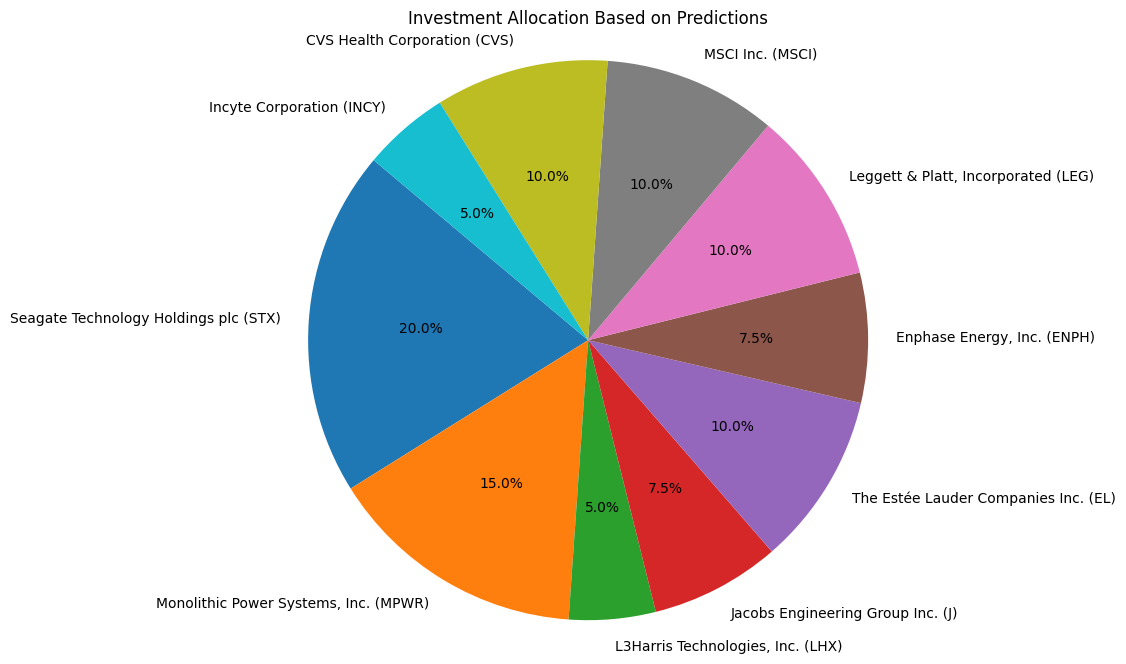

In [13]:
investments = {
    'Seagate Technology Holdings plc (STX)': 20,
    'Monolithic Power Systems, Inc. (MPWR)': 15,
    'L3Harris Technologies, Inc. (LHX)': 5,
    'Jacobs Engineering Group Inc. (J)': 7.5,
    'The Estée Lauder Companies Inc. (EL)': 10,
    'Enphase Energy, Inc. (ENPH)': 7.5,
    'Leggett & Platt, Incorporated (LEG)': 10,
    'MSCI Inc. (MSCI)': 10,
    'CVS Health Corporation (CVS)': 10,
    'Incyte Corporation (INCY)': 5
}
plt.figure(figsize=(10, 8))
plt.pie(investments.values(), labels=investments.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Investment Allocation Based on Predictions')
plt.axis('equal') 
plt.show()
